https://x-tabdeveloping.github.io/turftopic/

Turftopic is a topic modeling library which intends to simplify and streamline the usage of contextually sensitive topic models. We provide stable, minimal and scalable implementations of several types of models along with extensive documentation, so that you can make an informed choice about which model suits you best in the light of a given task or research question.

# Load Data

In [149]:
from datasets import Dataset, DatasetDict
import pandas as pd
from sklearn.model_selection import train_test_split

def df_to_hg_dataset_dict(df):
    '''
    SFT(Supervised Fine-Tuning을 위해 Pandas df를 Huggingface Dataset_dict으로 변환하는 함수
    df columns --> "text", "label"
    '''
    train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)
    
    train_dataset = Dataset.from_pandas(train_df)
    train_dataset = train_dataset.remove_columns(["__index_level_0__"])

    test_dataset = Dataset.from_pandas(test_df)
    test_dataset = test_dataset.remove_columns(["__index_level_0__"])

    dataset_dict = DatasetDict({'train': train_dataset, 'test': test_dataset})
    return dataset_dict

In [150]:
df = pd.read_csv("finance_data.csv")

In [151]:
datadict = df_to_hg_dataset_dict(df)
datadict

DatasetDict({
    train: Dataset({
        features: ['labels', 'sentence', 'kor_sentence'],
        num_rows: 3392
    })
    test: Dataset({
        features: ['labels', 'sentence', 'kor_sentence'],
        num_rows: 1454
    })
})

In [152]:
ds = datadict["train"]
target_ds = ds["sentence"][:500]
target_ds

['Operating profit for 2009 lower than outlook published earlier.',
 'Net sales of the Lehdentekijat unit was approximately EUR 14 million in 2007 and it had 70 employees.',
 'Community gardening has become a popular activity, especially to raise vegetables.',
 'Alfa group will have 43.9 % of voting stock in the new company and Telenor 35.4 % with a free float of 20.7 %.',
 'Of this, EUR 38.8 mn was net interest income.',
 "In January-November 2009, the group's sales totalled EUR 7,801.7 mn, which was a drop of 12.6 % from the same period of 2008.",
 "These include software development for internet and mobile telephone content, communications, value-added software, financial services, security applications, systems integration and electronics,'' EBRD informed.",
 "For the fiscal year ending September 30, 2009 the revenue from these customers was $ 10.012 million or around 11.0 % of the transportation group's revenue.",
 "With Aldata, we can help retailers ensure that their merchandisin

In [153]:
import re

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

target_ds = np.array([remove_numbers(text) for text in target_ds])
target_ds = np.array([text for text in target_ds if len(text)>2])
target_ds[:2]

array(['Operating profit for  lower than outlook published earlier.',
       'Net sales of the Lehdentekijat unit was approximately EUR  million in  and it had  employees.'],
      dtype='<U286')

# KeyNMF

In [154]:
from turftopic import KeyNMF

model = KeyNMF(10).fit(target_ds)
model.print_topics()

Output()

[20:05:19] Documents encoded.                                                                         ]8;id=904604;file://D:\GG_env\llm_env\lib\site-packages\turftopic\models\keynmf.py\keynmf.py]8;;\:]8;id=375461;file://D:\GG_env\llm_env\lib\site-packages\turftopic\models\keynmf.py#270\270]8;;\

[20:05:20] Keyword extraction done.                                                                   ]8;id=676390;file://D:\GG_env\llm_env\lib\site-packages\turftopic\models\keynmf.py\keynmf.py]8;;\:]8;id=255132;file://D:\GG_env\llm_env\lib\site-packages\turftopic\models\keynmf.py#276\276]8;;\

           Model fitting done.                                                                        ]8;id=877517;file://D:\GG_env\llm_env\lib\site-packages\turftopic\models\keynmf.py\keynmf.py]8;;\:]8;id=754366;file://D:\GG_env\llm_env\lib\site-packages\turftopic\models\keynmf.py#288\288]8;;\

┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Topic ID ┃ Highest Ranking                                                                                ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        0 │ profit, net, operating, million, omx, quarter, june, corporation, oyj, hel                     │
├──────────┼────────────────────────────────────────────────────────────────────────────────────────────────┤
│        1 │ sales, net, million, eurm, growth, year, percent, group, september, quarter                    │
├──────────┼────────────────────────────────────────────────────────────────────────────────────────────────┤
│        2 │ company, finnish, oyj, eurm, operations, business, group, share, stock, year                   │
├──────────┼────────────────────────────────────────────────────────────────────────────────────────────────┤
│        3 │ eur, loss, net, hel, million, quarter, period, year, october, said                             │
├──────────┼────────────────────────────────────────────────────────────────────────────────────────────────┤
│        4 │ shares, share, capital, percent, stock, market, board, value, total, stake                     │
├──────────┼────────────────────────────────────────────────────────────────────────────────────────────────┤
│        5 │ finland, baltic, finnish, group, paper, unit, plant, growth, financial, real                   │
├──────────┼────────────────────────────────────────────────────────────────────────────────────────────────┤
│        6 │ business, financial, services, companies, omx, operations, management, total, group, according │
├──────────┼────────────────────────────────────────────────────────────────────────────────────────────────┤
│        7 │ finnish, mln, oyj, euro, net, hel, investment, loss, value, total                              │
├──────────┼────────────────────────────────────────────────────────────────────────────────────────────────┤
│        8 │ helsinki, omx, eurm, corporation, services, stock, oyj, technology, finnish, october           │
├──────────┼────────────────────────────────────────────────────────────────────────────────────────────────┤
│        9 │ mn, eur, increased, operating, operations, agreement, sales, compared, value, profit           │
└──────────┴────────────────────────────────────────────────────────────────────────────────────────────────┘

In [155]:
import numpy as np
vocab = model.get_vocab()
len(vocab), vocab

(63,
 array(['according', 'agreement', 'baltic', 'based', 'board', 'business',
        'capital', 'companies', 'company', 'compared', 'corporation',
        'customers', 'eur', 'eurm', 'euro', 'financial', 'finland',
        'finnish', 'group', 'growth', 'hel', 'helsinki', 'increased',
        'investment', 'june', 'loss', 'management', 'market', 'million',
        'mln', 'mn', 'net', 'new', 'october', 'omx', 'operating',
        'operations', 'oyj', 'paper', 'percent', 'period', 'plant',
        'products', 'profit', 'project', 'quarter', 'real', 'result',
        'said', 'sales', 'september', 'services', 'share', 'shares',
        'solutions', 'stake', 'stock', 'technology', 'today', 'total',
        'unit', 'value', 'year'], dtype=object))

In [156]:
# We will produce a BoW matrix to extract term frequencies
document_term_matrix = model.vectorizer.transform(target_ds)
frequencies = document_term_matrix.sum(axis=0)
frequencies = np.squeeze(np.asarray(frequencies))
frequencies

array([ 18,  12,  10,  12,  18,  36,  12,  10,  91,  11,  12,  11, 129,
        12,  21,  21,  40,  62,  42,  12,  20,  28,  11,  13,  10,  14,
        15,  29,  45,  34,  51,  48,  31,  12,  14,  18,  22,  30,  10,
        21,  29,  14,  12,  37,  10,  18,  10,  10,  60,  48,  12,  19,
        26,  22,  15,  10,  10,  12,  15,  16,  19,  10,  39], dtype=int64)

In [157]:
# We select the 99th percentile
selected_terms_mask = frequencies > np.quantile(frequencies, 0.99)
selected_terms_mask

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [158]:
import pandas as pd
terms_with_axes = pd.DataFrame({
    "inference": model.components_[7][:],
    "measurement_devices": model.components_[1][:],
    "noise": model.components_[6][:],
    "term": vocab[:]
 })

In [159]:
terms_with_axes

,inference,measurement_devices,noise,term
0,0.001127,0.000000,0.032869,according
1,0.000000,0.000000,0.030993,agreement
2,0.000000,0.048124,0.000000,baltic
3,0.000000,0.000000,0.004100,based
4,0.000249,0.000000,0.000000,board
...,...,...,...,...
58,0.032529,0.003751,0.000000,today
59,0.078625,0.000000,0.041730,total
60,0.000000,0.014696,0.000000,unit
61,0.080617,0.000000,0.000000,value


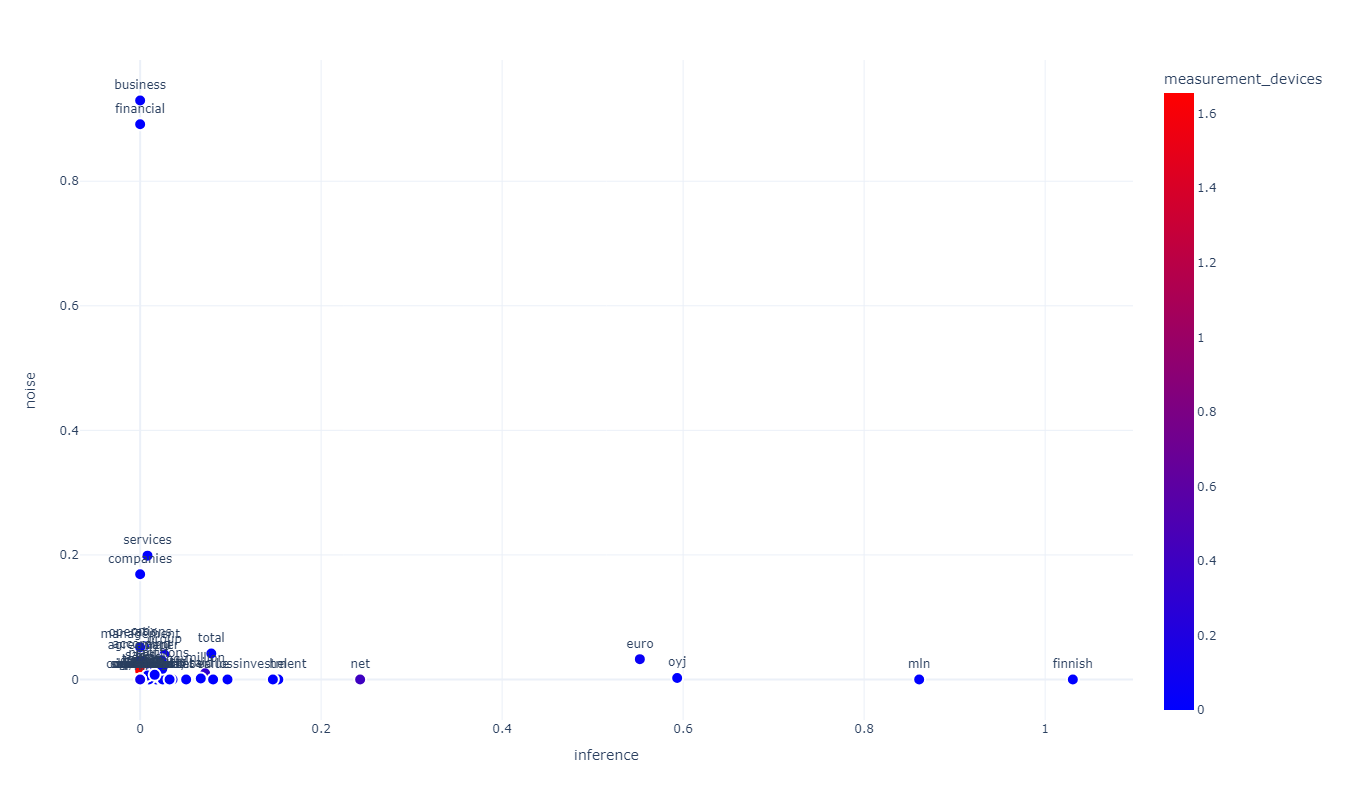

In [160]:
import plotly.express as px

px.scatter(
    terms_with_axes,
    text="term",
    x="inference",
    y="noise",
    color="measurement_devices",
    template="plotly_white",
    color_continuous_scale="Bluered",
).update_layout(
    width=1200,
    height=800
).update_traces(
    textposition="top center",
    marker=dict(size=12, line=dict(width=2, color="white"))
)

# SemanticSignalSeparation

In [161]:
from turftopic import SemanticSignalSeparation

model = SemanticSignalSeparation(10, encoder="all-MiniLM-L12-v2")#, objective="orthogonality") # , objective="independence")
model.fit(target_ds)
model.print_topics()

Output()

[20:05:32] Documents encoded.                                                                          ]8;id=860344;file://D:\GG_env\llm_env\lib\site-packages\turftopic\models\decomp.py\decomp.py]8;;\:]8;id=340483;file://D:\GG_env\llm_env\lib\site-packages\turftopic\models\decomp.py#75\75]8;;\

D:\GG_env\llm_env\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.

           Decomposition done.                                                                         ]8;id=173621;file://D:\GG_env\llm_env\lib\site-packages\turftopic\models\decomp.py\decomp.py]8;;\:]8;id=169970;file://D:\GG_env\llm_env\lib\site-packages\turftopic\models\decomp.py#78\78]8;;\

           Term extraction done.                                                                       ]8;id=337937;file://D:\GG_env\llm_env\lib\site-packages\turftopic\models\decomp.py\decomp.py]8;;\:]8;id=585508;file://D:\GG_env\llm_env\lib\site-packages\turftopic\models\decomp.py#81\81]8;;\

           Vocabulary encoded.                                                                         ]8;id=426402;file://D:\GG_env\llm_env\lib\site-packages\turftopic\models\decomp.py\decomp.py]8;;\:]8;id=677231;file://D:\GG_env\llm_env\lib\site-packages\turftopic\models\decomp.py#84\84]8;;\

           Model fitting done.                                                                         ]8;id=291765;file://D:\GG_env\llm_env\lib\site-packages\turftopic\models\decomp.py\decomp.py]8;;\:]8;id=797450;file://D:\GG_env\llm_env\lib\site-packages\turftopic\models\decomp.py#88\88]8;;\

┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Topic ID ┃ Highest Ranking                                   ┃ Lowest Ranking                                   ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│        0 │ shares, stock, share, capital, percent            │ oyj, eurm, loss, profit, technology              │
├──────────┼───────────────────────────────────────────────────┼──────────────────────────────────────────────────┤
│        1 │ customers, companies, services, net, sales        │ plant, eur, june, year, unit                     │
├──────────┼───────────────────────────────────────────────────┼──────────────────────────────────────────────────┤
│        2 │ company, corporation, companies, business, shares │ june, september, october, compared, today        │
├──────────┼───────────────────────────────────────────────────┼──────────────────────────────────────────────────┤
│        3 │ june, october, september, today, eurm             │ finland, helsinki, corporation, financial,       │
│          │                                                   │ operations                                       │
├──────────┼───────────────────────────────────────────────────┼──────────────────────────────────────────────────┤
│        4 │ eur, euro, finland, finnish, helsinki             │ sales, stock, shares, products, loss             │
├──────────┼───────────────────────────────────────────────────┼──────────────────────────────────────────────────┤
│        5 │ eur, euro, paper, eurm, quarter                   │ growth, investment, profit, increased, project   │
├──────────┼───────────────────────────────────────────────────┼──────────────────────────────────────────────────┤
│        6 │ omx, oyj, said, stake, today                      │ sales, euro, customers, products, business       │
├──────────┼───────────────────────────────────────────────────┼──────────────────────────────────────────────────┤
│        7 │ technology, paper, plant, unit, project           │ shares, profit, market, sales, stock             │
├──────────┼───────────────────────────────────────────────────┼──────────────────────────────────────────────────┤
│        8 │ net, corporation, total, financial, mln           │ finland, helsinki, baltic, finnish, mn           │
├──────────┼───────────────────────────────────────────────────┼──────────────────────────────────────────────────┤
│        9 │ value, euro, finnish, unit, increased             │ management, operating, loss, companies,          │
│          │                                                   │ operations                                       │
└──────────┴───────────────────────────────────────────────────┴──────────────────────────────────────────────────┘

In [162]:
vocab = model.get_vocab()

document_term_matrix = model.vectorizer.transform(target_ds)
frequencies = document_term_matrix.sum(axis=0)
frequencies = np.squeeze(np.asarray(frequencies))

selected_terms_mask = frequencies > np.quantile(frequencies, 0.99)

terms_with_axes = pd.DataFrame({
    "inference": model.components_[7][:],
    "measurement_devices": model.components_[1][:],
    "noise": model.components_[6][:],
    "term": vocab[:]
 })

In [163]:
terms_with_axes

,inference,measurement_devices,noise,term
0,0.606122,0.390032,1.401312,according
1,0.244835,-0.286035,1.194211,agreement
2,0.540790,-0.494858,0.636618,baltic
3,0.756383,0.958471,1.422692,based
4,0.490621,-0.042593,1.436462,board
...,...,...,...,...
58,0.491398,-0.100498,1.746754,today
59,-0.126722,-0.449587,0.272513,total
60,1.327345,-0.552536,0.070985,unit
61,0.015886,-0.114117,0.805936,value


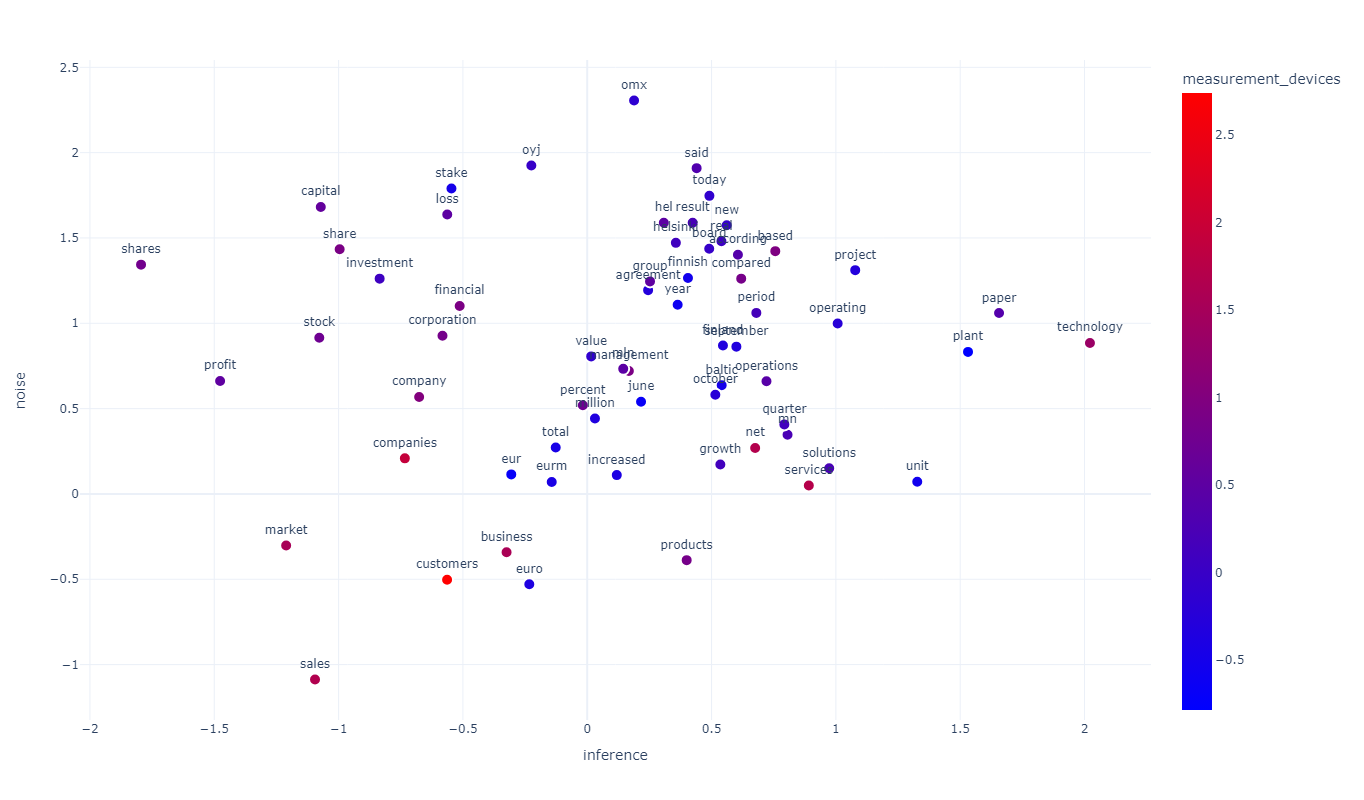

In [164]:
px.scatter(
    terms_with_axes,
    text="term",
    x="inference",
    y="noise",
    color="measurement_devices",
    template="plotly_white",
    color_continuous_scale="Bluered",
).update_layout(
    width=1200,
    height=800
).update_traces(
    textposition="top center",
    marker=dict(size=12, line=dict(width=2, color="white"))
)

In [165]:
model.print_topic_distribution(
    "The Lithuanian beer market made up 14.41 million liters in January, a rise of 0.8 percent from the year-earlier figure, the Lithuanian Brewers' Association reporting citing the results from its members."
)


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ Topic name                               ┃ Score ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ 9_value_euro_finnish_unit                │  1.80 │
│ 0_shares_stock_share_capital             │  0.36 │
│ 3_june_october_september_today           │  0.19 │
│ 7_technology_paper_plant_unit            │ -0.33 │
│ 4_eur_euro_finland_finnish               │ -0.37 │
│ 1_customers_companies_services_net       │ -0.46 │
│ 6_omx_oyj_said_stake                     │ -0.77 │
│ 5_eur_euro_paper_eurm                    │ -0.83 │
│ 2_company_corporation_companies_business │ -1.11 │
│ 8_net_corporation_total_financial        │ -1.73 │
└──────────────────────────────────────────┴───────┘

# topicwizard 시각화

In [166]:
from turftopic import SemanticSignalSeparation
from topicwizard import figures

model = SemanticSignalSeparation(10, encoder="all-MiniLM-L12-v2")
topic_data = model.prepare_topic_data(target_ds)
topic_data

Output()

D:\GG_env\llm_env\lib\site-packages\sklearn\decomposition\_fastica.py:128: ConvergenceWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.

[20:05:45] Decomposition done.                                                                         ]8;id=436967;file://D:\GG_env\llm_env\lib\site-packages\turftopic\models\decomp.py\decomp.py]8;;\:]8;id=204817;file://D:\GG_env\llm_env\lib\site-packages\turftopic\models\decomp.py#78\78]8;;\

           Term extraction done.                                                                       ]8;id=94279;file://D:\GG_env\llm_env\lib\site-packages\turftopic\models\decomp.py\decomp.py]8;;\:]8;id=76173;file://D:\GG_env\llm_env\lib\site-packages\turftopic\models\decomp.py#81\81]8;;\

           Vocabulary encoded.                                                                         ]8;id=896012;file://D:\GG_env\llm_env\lib\site-packages\turftopic\models\decomp.py\decomp.py]8;;\:]8;id=583639;file://D:\GG_env\llm_env\lib\site-packages\turftopic\models\decomp.py#84\84]8;;\

           Model fitting done.                                                                         ]8;id=47088;file://D:\GG_env\llm_env\lib\site-packages\turftopic\models\decomp.py\decomp.py]8;;\:]8;id=429502;file://D:\GG_env\llm_env\lib\site-packages\turftopic\models\decomp.py#88\88]8;;\

{'corpus': array(['Operating profit for  lower than outlook published earlier.',
        'Net sales of the Lehdentekijat unit was approximately EUR  million in  and it had  employees.',
        'Community gardening has become a popular activity, especially to raise vegetables.',
        'Alfa group will have . % of voting stock in the new company and Telenor . % with a free float of . %.',
        'Of this, EUR . mn was net interest income.',
        "In January-November , the group's sales totalled EUR ,. mn, which was a drop of . % from the same period of .",
        "These include software development for internet and mobile telephone content, communications, value-added software, financial services, security applications, systems integration and electronics,'' EBRD informed.",
        "For the fiscal year ending September ,  the revenue from these customers was $ . million or around . % of the transportation group's revenue.",
        "With Aldata, we can help retailers ensure that

In [167]:
xaxis = topic_data["topic_names"][0]
yaxis = topic_data["topic_names"][1]
xaxis, yaxis

('0_loss_sales_stock_profit', '1_oyj_eurm_loss_technology')

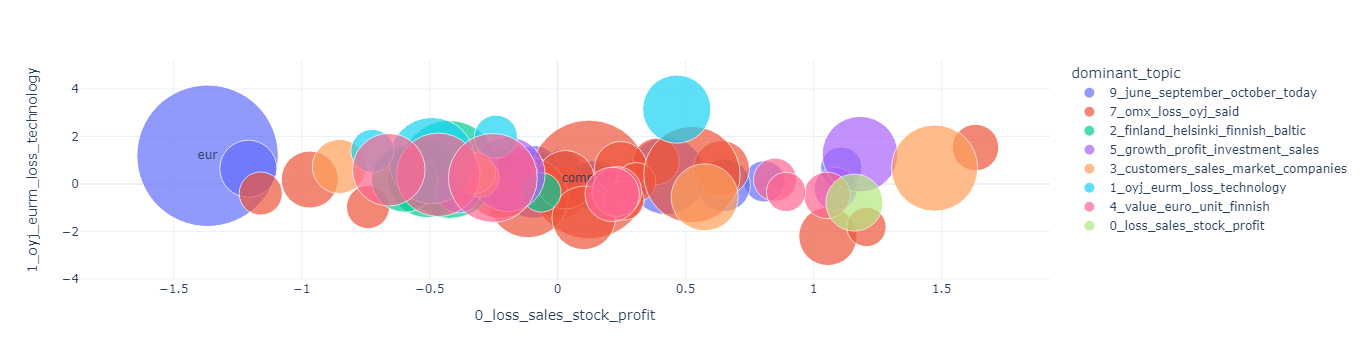

In [168]:
figures.word_map(
  topic_data,
  topic_axes=(
     xaxis,
     yaxis)
)